<h1><center>Speech Emotion Recognition</center></h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
dataset_path = '//content//drive//MyDrive//data//wav//audio_speech_actors_01-24//'

In [4]:
# Function to extract features from each audio file
def extract_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to extract features from each audio file without silent moments
def extract_features_trim(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    audio, index = librosa.effects.trim(audio, top_db=20, frame_length=512, hop_length=256)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Function for displaying confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix For {}'.format(title))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [5]:
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<center><h1>Machine Learning Models</center></h1> <br/>




- Support Vector Machine
- K Nearest Neighbor
- Decision Tree
- Random Forest


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.57      0.71      0.63        34
        Calm       0.43      0.68      0.53        31
     Disgust       0.43      0.50      0.46        38
     Fearful       0.46      0.40      0.42        43
       Happy       0.53      0.40      0.46        45
     Neutral       0.64      0.35      0.45        20
         Sad       0.33      0.31      0.32        35
   Surprised       0.63      0.57      0.60        42

    accuracy                           0.49       288
   macro avg       0.50      0.49      0.48       288
weighted avg       0.50      0.49      0.49       288



48.95833333333333


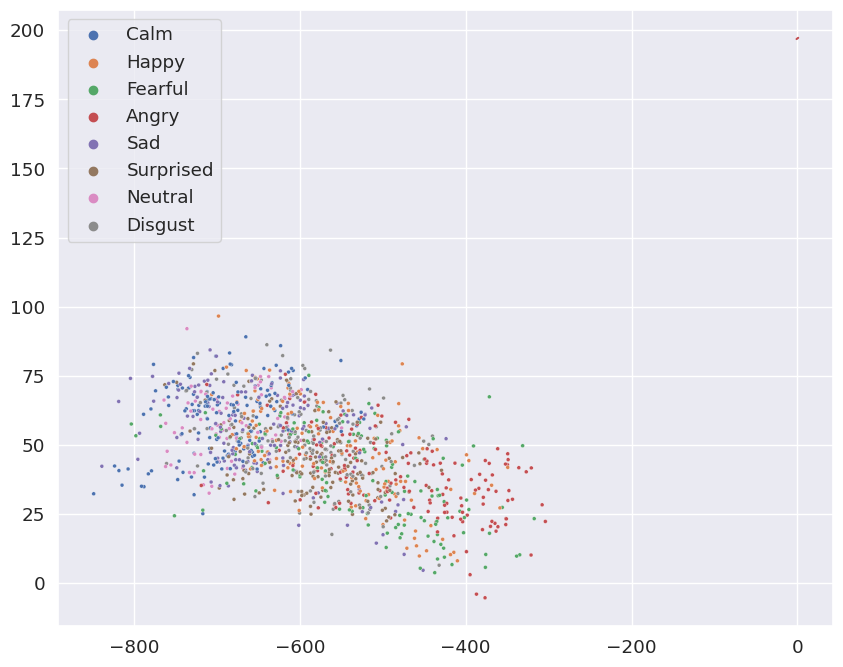

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

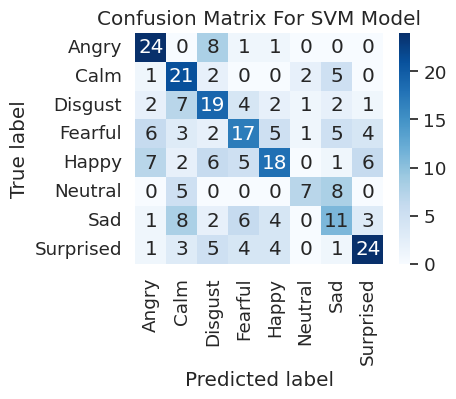

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'SVM Model')

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Angry       0.48      0.79      0.60        34
        Calm       0.42      0.87      0.56        31
     Disgust       0.39      0.32      0.35        38
     Fearful       0.51      0.49      0.50        43
       Happy       0.48      0.33      0.39        45
     Neutral       0.20      0.05      0.08        20
         Sad       0.41      0.26      0.32        35
   Surprised       0.43      0.38      0.41        42

    accuracy                           0.44       288
   macro avg       0.42      0.44      0.40       288
weighted avg       0.43      0.44      0.42       288



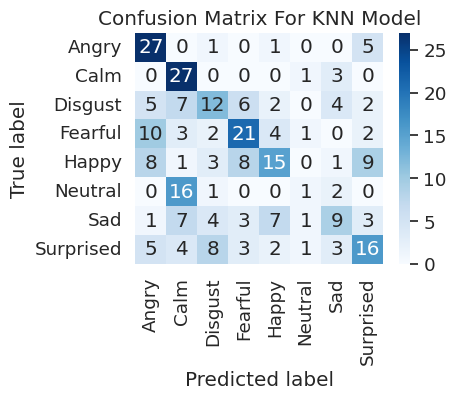

In [14]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'KNN Model')

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

44.44444444444444


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.46      0.47      0.46        34
        Calm       0.45      0.45      0.45        31
     Disgust       0.34      0.32      0.33        38
     Fearful       0.45      0.47      0.46        43
       Happy       0.36      0.33      0.34        45
     Neutral       0.35      0.35      0.35        20
         Sad       0.34      0.37      0.36        35
   Surprised       0.30      0.31      0.31        42

    accuracy                           0.38       288
   macro avg       0.38      0.38      0.38       288
weighted avg       0.38      0.38      0.38       288



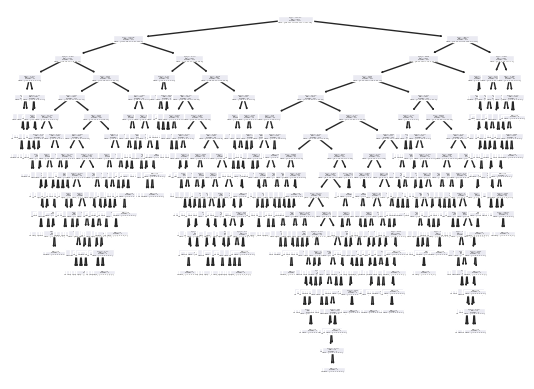

In [ ]:
from sklearn import tree
tree.plot_tree(dt);


[Text(0.5563347048875762, 0.9736842105263158, 'x[0] <= -617.917\ngini = 0.871\nsamples = 1152\nvalue = [158, 161, 154, 149, 147, 76, 157, 150]'),
 Text(0.21968845274390245, 0.9210526315789473, 'x[0] <= -672.568\ngini = 0.819\nsamples = 476\nvalue = [9, 141, 48, 30, 41, 67, 101, 39]'),
 Text(0.09683689024390243, 0.868421052631579, 'x[24] <= -3.849\ngini = 0.763\nsamples = 263\nvalue = [3, 98, 18, 13, 6, 45, 63, 17]'),
 Text(0.020731707317073172, 0.8157894736842105, 'x[8] <= -5.378\ngini = 0.501\nsamples = 41\nvalue = [0, 27, 0, 0, 1, 3, 10, 0]'),
 Text(0.012195121951219513, 0.7631578947368421, 'x[14] <= -2.303\ngini = 0.602\nsamples = 16\nvalue = [0, 6, 0, 0, 1, 1, 8, 0]'),
 Text(0.007317073170731708, 0.7105263157894737, 'x[14] <= -4.802\ngini = 0.37\nsamples = 9\nvalue = [0, 1, 0, 0, 1, 0, 7, 0]'),
 Text(0.004878048780487805, 0.6578947368421053, 'x[19] <= -2.27\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0, 0, 0]'),
 Text(0.0024390243902439024, 0.6052631578947368, 'gini = 0.0\nsa

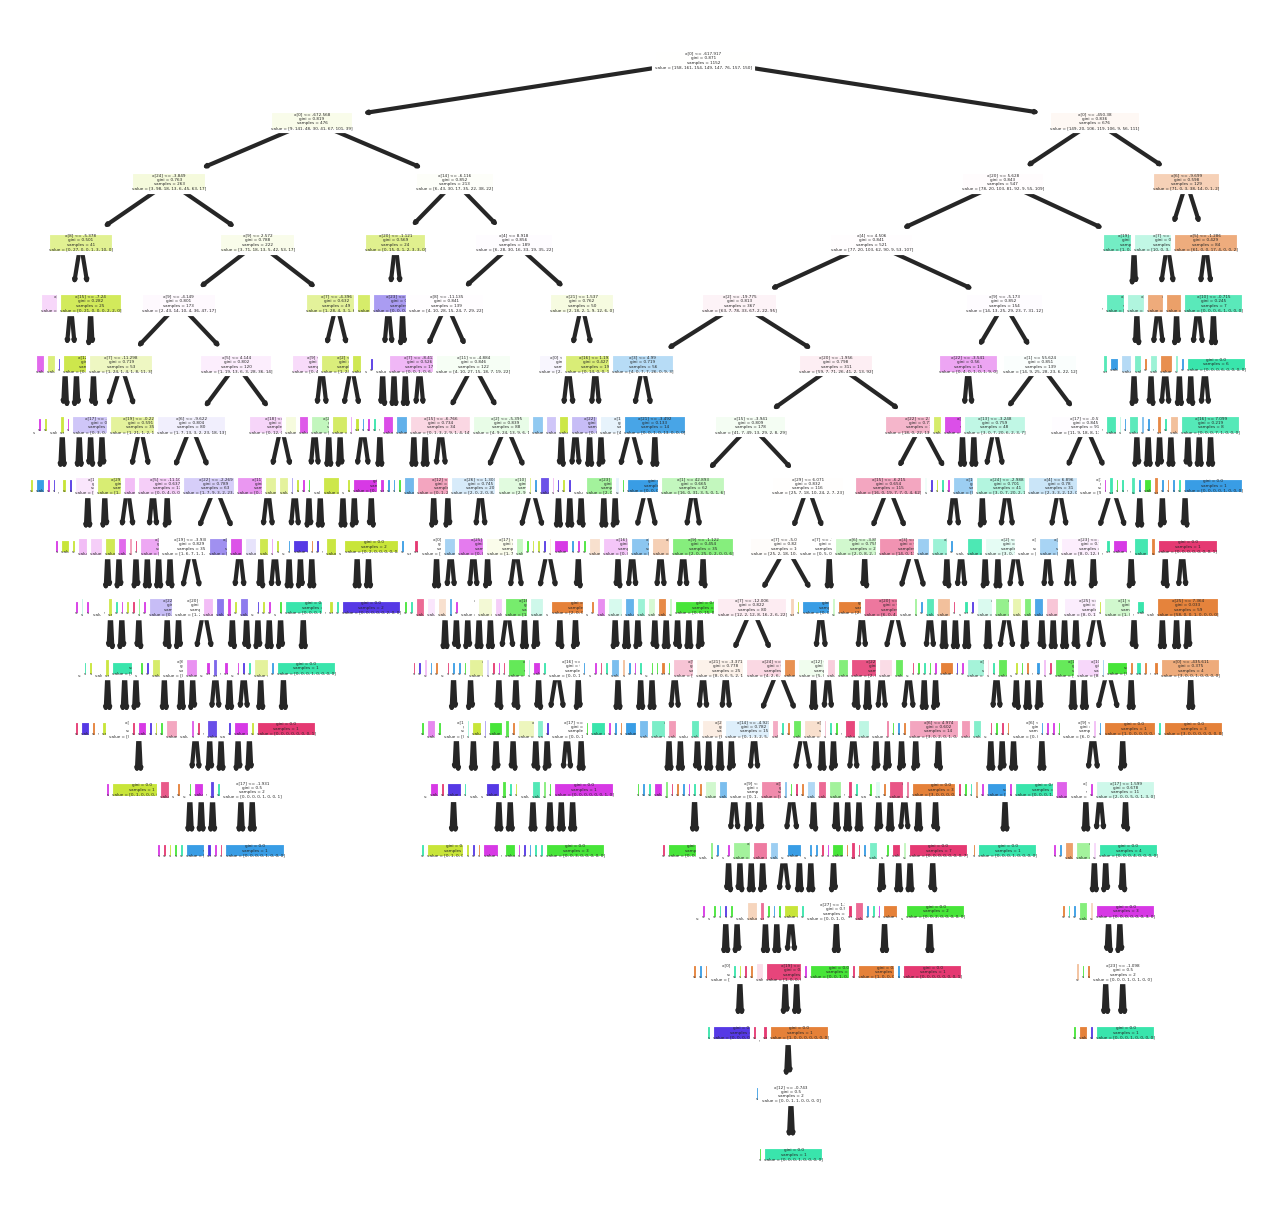

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt, filled=True)

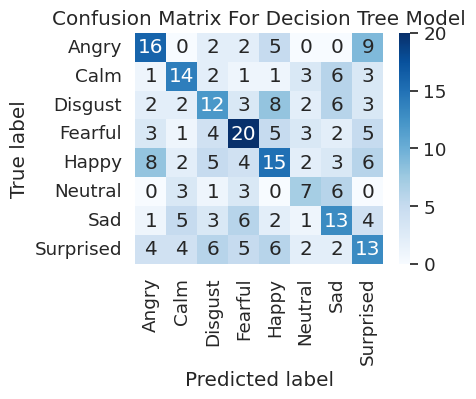

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Decision Tree Model')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.67      0.76      0.71        34
        Calm       0.57      0.81      0.67        31
     Disgust       0.60      0.66      0.62        38
     Fearful       0.70      0.65      0.67        43
       Happy       0.69      0.60      0.64        45
     Neutral       0.88      0.35      0.50        20
         Sad       0.53      0.49      0.51        35
   Surprised       0.64      0.67      0.65        42

    accuracy                           0.64       288
   macro avg       0.66      0.62      0.62       288
weighted avg       0.65      0.64      0.63       288



In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

48.95833333333333


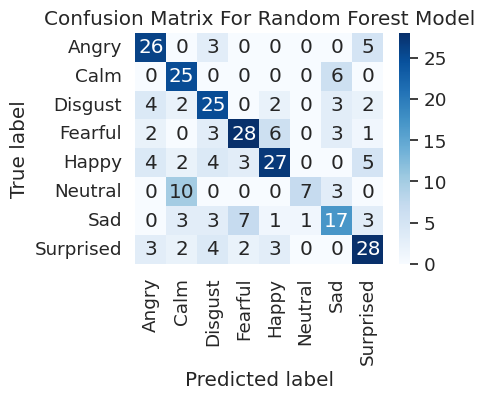

In [ ]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Random Forest Model')

As we can see, the best results of machine learning models are:
- Random Forest => 62%
- Support Vector Machine => 46%

i'll make more experiments on these two models after i explore deep learning.

<center><h1>Deep Learning Models</center></h1> <br/>

Deep learning models have shown promising results in this area due to their ability to automatically learn features from raw data.

Some common deep learning models used in speech emotion classification include:
- <b>Convolutional Neural Networks (CNNs) </b>
- Recurrent Neural Networks (RNNs)
- Long Short-Term Memory (LSTM) Networks 

These models can be used to learn discriminative features from the speech signal and make predictions about the emotional state of the speaker.

First let's construct <b>CNN Model</b>.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1080, 30)
y_train: (1080, 8)
X_test: (360, 30)
y_test: (360, 8)


In [ ]:
SS = StandardScaler()

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# Function to plot Training Accuracy vs Validation Accuracy
def TrainVal_plot(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    epochs = range(1, early_stop.stopped_epoch+2)
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
    plt.title('Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define input shape
input_shape = (X_train.shape[1], 1)

# Create model
model = Sequential()


model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))

# Compile model with appropriate loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 256)           98560     
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 128)               721024    
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
history = model.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                       callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 3s 42ms/step - loss: 1.9940 - accuracy: 0.2028 - val_loss: 1.9006 - val_accuracy: 0.2222
Epoch 2/300
34/34 [==============================] - 1s 37ms/step - loss: 1.7715 - accuracy: 0.3370 - val_loss: 1.7736 - val_accuracy: 0.3028
Epoch 3/300
34/34 [==============================] - 1s 32ms/step - loss: 1.5576 - accuracy: 0.4176 - val_loss: 1.6116 - val_accuracy: 0.3944
Epoch 4/300
34/34 [==============================] - 1s 30ms/step - loss: 1.3077 - accuracy: 0.5213 - val_loss: 1.5646 - val_accuracy: 0.4194
Epoch 5/300
34/34 [==============================] - 1s 32ms/step - loss: 1.1145 - accuracy: 0.5935 - val_loss: 1.3556 - val_accuracy: 0.4944
Epoch 6/300
34/34 [==============================] - 1s 33ms/step - loss: 0.8663 - accuracy: 0.6898 - val_loss: 1.3231 - val_accuracy: 0.5194
Epoch 7/300
34/34 [==============================] - 1s 34ms/step - loss: 0.7152 - accuracy: 0.7602 - val_loss: 1.3077 - val_accuracy: 0.5361
Epoch 

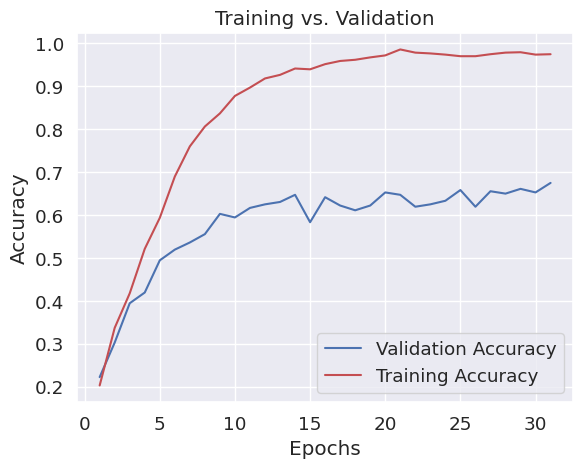

In [ ]:
TrainVal_plot(history)

If the training accuracy is 100% and the validation accuracy is only 60%, it is a clear indication that the model is overfitting on the training data. Overfitting occurs when a model learns to recognize the specific examples in the training data too well, to the point where it is memorizing the data rather than learning from it. As a result, the model does not generalize well to new, unseen data, which is reflected in the lower validation accuracy.

There are several reasons why overfitting may occur:

- Model complexity: If the model is too complex for the data, it can lead to overfitting. A complex model can fit the training data very well, but it may not generalize well to new data.

- Limited training data: If there is not enough training data, the model may overfit to the few examples it has seen. In this case, collecting more data or using data augmentation techniques can help to mitigate overfitting.

- Poor regularization: Regularization techniques such as dropout, weight decay, and early stopping can help to prevent overfitting by reducing the model's ability to memorize the training data. If these techniques are not used or not applied properly, overfitting can occur.

To address overfitting, it is important to adjust the model architecture and/or training process. This can include reducing the model complexity, increasing the amount of training data, using regularization techniques, or adjusting the learning rate or optimizer. It may also be useful to monitor the model's performance during training using metrics such as validation accuracy and loss, and to use techniques such as early stopping to prevent the model from continuing to train after it has stopped improving on the validation set.

In [ ]:
model2 = Sequential()

model2.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(Dropout(0.7))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2.add(Flatten())

model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.6))

model2.add(Dense(units=8, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 26, 32)            192       
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            10304     
                                                                 
 dropout_1 (Dropout)         (None, 22, 64)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 18, 64)            20544     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               147584    
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [ ]:
history = model2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 21ms/step - loss: 2.0660 - accuracy: 0.1444 - val_loss: 2.0203 - val_accuracy: 0.1972
Epoch 2/300
34/34 [==============================] - 0s 13ms/step - loss: 1.9973 - accuracy: 0.2019 - val_loss: 1.9709 - val_accuracy: 0.1972
Epoch 3/300
34/34 [==============================] - 0s 15ms/step - loss: 1.9651 - accuracy: 0.2185 - val_loss: 1.9336 - val_accuracy: 0.2222
Epoch 4/300
34/34 [==============================] - 0s 14ms/step - loss: 1.9272 - accuracy: 0.2333 - val_loss: 1.9358 - val_accuracy: 0.2667
Epoch 5/300
34/34 [==============================] - 0s 14ms/step - loss: 1.8745 - accuracy: 0.2824 - val_loss: 1.8764 - val_accuracy: 0.2611
Epoch 6/300
34/34 [==============================] - 0s 13ms/step - loss: 1.8231 - accuracy: 0.3074 - val_loss: 1.8532 - val_accuracy: 0.2778
Epoch 7/300
34/34 [==============================] - 0s 14ms/step - loss: 1.7850 - accuracy: 0.3102 - val_loss: 1.8080 - val_accuracy: 0.3361
Epoch 

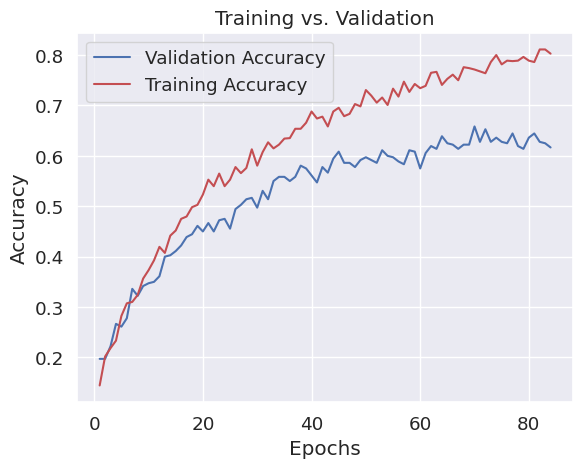

In [ ]:
TrainVal_plot(history)

In [ ]:
model3 = Sequential()

model3.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3.add(Dropout(0.7))
model3.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3.add(Flatten())

model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.6))

model3.add(Dense(units=8, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 24, 32)            256       
                                                                 
 conv1d_8 (Conv1D)           (None, 18, 32)            7200      
                                                                 
 dropout_3 (Dropout)         (None, 18, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 12, 64)            14400     
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               98432     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [ ]:
history = model3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 16ms/step - loss: 2.0824 - accuracy: 0.1407 - val_loss: 2.0518 - val_accuracy: 0.1583
Epoch 2/300
34/34 [==============================] - 0s 9ms/step - loss: 2.0345 - accuracy: 0.1796 - val_loss: 2.0103 - val_accuracy: 0.1944
Epoch 3/300
34/34 [==============================] - 0s 11ms/step - loss: 2.0009 - accuracy: 0.2000 - val_loss: 1.9654 - val_accuracy: 0.2139
Epoch 4/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9688 - accuracy: 0.2194 - val_loss: 1.9350 - val_accuracy: 0.2167
Epoch 5/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9354 - accuracy: 0.2491 - val_loss: 1.9165 - val_accuracy: 0.2639
Epoch 6/300
34/34 [==============================] - 0s 11ms/step - loss: 1.8809 - accuracy: 0.2676 - val_loss: 1.8631 - val_accuracy: 0.2889
Epoch 7/300
34/34 [==============================] - 0s 11ms/step - loss: 1.8633 - accuracy: 0.2741 - val_loss: 1.8328 - val_accuracy: 0.3222
Epoch 8

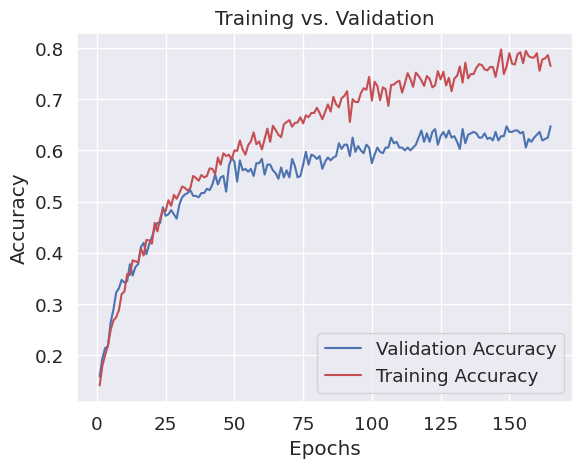

In [ ]:
TrainVal_plot(history)

i'll try preprocessing for audio data using <b>Trim audio technique</b>

In [ ]:
# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features_trim(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

In [ ]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

OHE = OneHotEncoder()
SS = StandardScaler()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [ ]:
model2_trim = Sequential()

model2_trim.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2_trim.add(Dropout(0.7))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2_trim.add(Flatten())

model2_trim.add(Dense(units=128, activation='relu'))
model2_trim.add(Dropout(0.6))

model2_trim.add(Dense(units=8, activation='softmax'))

model2_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2_trim.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 26, 32)            192       
                                                                 
 conv1d_11 (Conv1D)          (None, 22, 64)            10304     
                                                                 
 dropout_5 (Dropout)         (None, 22, 64)            0         
                                                                 
 conv1d_12 (Conv1D)          (None, 18, 64)            20544     
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               147584    
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [ ]:
history = model2_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 22ms/step - loss: 2.0608 - accuracy: 0.1491 - val_loss: 2.0187 - val_accuracy: 0.1833
Epoch 2/300
34/34 [==============================] - 0s 14ms/step - loss: 1.9863 - accuracy: 0.2074 - val_loss: 1.9384 - val_accuracy: 0.2472
Epoch 3/300
34/34 [==============================] - 0s 14ms/step - loss: 1.9451 - accuracy: 0.2250 - val_loss: 1.9123 - val_accuracy: 0.2556
Epoch 4/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8958 - accuracy: 0.2574 - val_loss: 1.8728 - val_accuracy: 0.2750
Epoch 5/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8262 - accuracy: 0.2963 - val_loss: 1.8427 - val_accuracy: 0.3000
Epoch 6/300
34/34 [==============================] - 0s 13ms/step - loss: 1.8044 - accuracy: 0.3231 - val_loss: 1.7897 - val_accuracy: 0.3056
Epoch 7/300
34/34 [==============================] - 0s 13ms/step - loss: 1.7345 - accuracy: 0.3407 - val_loss: 1.7525 - val_accuracy: 0.3444
Epoch 

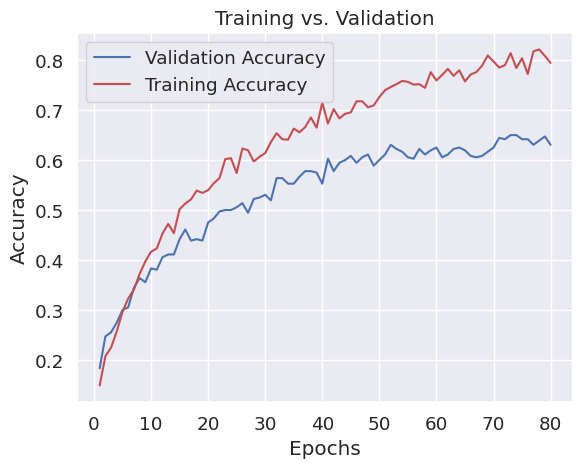

In [ ]:
TrainVal_plot(history)

In [ ]:
model3_trim = Sequential()

model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3_trim.add(Dropout(0.7))
model3_trim.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3_trim.add(Flatten())

model3_trim.add(Dense(units=128, activation='relu'))
model3_trim.add(Dropout(0.6))

model3_trim.add(Dense(units=8, activation='softmax'))

model3_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3_trim.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 24, 32)            256       
                                                                 
 conv1d_14 (Conv1D)          (None, 18, 32)            7200      
                                                                 
 dropout_7 (Dropout)         (None, 18, 32)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 12, 64)            14400     
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               98432     
                                                                 
 dropout_8 (Dropout)         (None, 128)              

In [ ]:
history = model3_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 17ms/step - loss: 2.0757 - accuracy: 0.1463 - val_loss: 2.0416 - val_accuracy: 0.2028
Epoch 2/300
34/34 [==============================] - 0s 10ms/step - loss: 2.0207 - accuracy: 0.1759 - val_loss: 1.9913 - val_accuracy: 0.2167
Epoch 3/300
34/34 [==============================] - 0s 12ms/step - loss: 2.0021 - accuracy: 0.2065 - val_loss: 1.9620 - val_accuracy: 0.2389
Epoch 4/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9621 - accuracy: 0.2287 - val_loss: 1.9329 - val_accuracy: 0.2500
Epoch 5/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9233 - accuracy: 0.2259 - val_loss: 1.9125 - val_accuracy: 0.2667
Epoch 6/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8985 - accuracy: 0.2806 - val_loss: 1.9048 - val_accuracy: 0.2944
Epoch 7/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8698 - accuracy: 0.2852 - val_loss: 1.8425 - val_accuracy: 0.3361
Epoch 

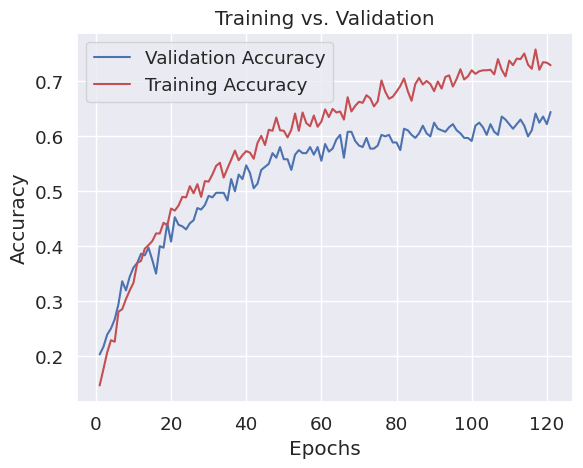

In [ ]:
TrainVal_plot(history)

As we can see we have completed 5 experiments:

<table style="width: 50%;
  background-color: #000000;
  border-collapse: collapse;
  border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  color: #ffffff;">
  <thead style="background-color: #007548;">
    <tr>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Model Name</th>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Total Parametars</th>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Augmentation</th>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Trimming</th>
        <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No. Epochs</th>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Accuracy</th>
      <th style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Validation Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">model</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">851,656</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
        <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">29</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">97%</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">65%</td>
    </tr>
    <tr>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">model2</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">179,656</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
        <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">94</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">80%</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">68%</td>
    </tr>
    <tr>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">model3</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">121,320</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
        <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">134</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">75%</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">64%</td>
    </tr>
    <tr>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">model2_trim</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">179,656</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Yes</td>
        <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">34</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">87%</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">70%</td>
    </tr>
    <tr>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">model3_trim</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">121,320</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">No</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">Yes</td>
        <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px;">165</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px; color: #ff0000;">77%</td>
      <td style="border-width: 2px;
  border-color: #006f85;
  border-style: outset;
  padding: 3px; color: #ff0000;">70%</td>
    </tr>
  </tbody>
</table>